# Random Forest Classification

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sn
from numpy import std
from numpy import mean
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline

In [2]:
%cd Z:\PPMI_Data\Excels\NonMotors\The251
df1 = pd.read_csv('Feats45_Categ.csv')
df1['APPRDX'] = df1['APPRDX'] -1
print(df1.shape)
df1.head(2)

Z:\PPMI_Data\Excels\NonMotors\The251
(251, 46)


,APPRDX,Benton,Clock,COGSTATE,Epworth,Geriatric_Depression,Hopkins_Recall,Hopkins_Recog,LetterNumber,Lexical_Fluency,...,SCOPA_Sex,Semantic,Education,Hand,STAIS,STAIA,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
0,0,0,0,0,1,1,0,0,1,1,...,1,0,1,0,2,1,1,2,1,2
1,0,0,1,0,0,1,0,0,1,1,...,0,2,1,0,0,0,1,0,0,2


# Running Model with different Features

## RanFor 100 times, all 45 Feats 

In [3]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(80))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.80625
2
Mean accuracy: 0.8125
3
Mean accuracy: 0.8
4
Mean accuracy: 0.8125
5
Mean accuracy: 0.86875
6
Mean accuracy: 0.825
7
Mean accuracy: 0.81875
8
Mean accuracy: 0.8375
9
Mean accuracy: 0.8375
10
Mean accuracy: 0.825
11
Mean accuracy: 0.80625
12
Mean accuracy: 0.84375
13
Mean accuracy: 0.8
14
Mean accuracy: 0.81875
15
Mean accuracy: 0.78125
16
Mean accuracy: 0.83125
17
Mean accuracy: 0.79375
18
Mean accuracy: 0.79375
19
Mean accuracy: 0.8125
20
Mean accuracy: 0.83125
21
Mean accuracy: 0.78125
22
Mean accuracy: 0.85
23
Mean accuracy: 0.825
24
Mean accuracy: 0.85
25
Mean accuracy: 0.7875
26
Mean accuracy: 0.8
27
Mean accuracy: 0.825
28
Mean accuracy: 0.7875
29
Mean accuracy: 0.83125
30
Mean accuracy: 0.85
31
Mean accuracy: 0.825
32
Mean accuracy: 0.825
33
Mean accuracy: 0.8125
34
Mean accuracy: 0.81875
35
Mean accuracy: 0.8125
36
Mean accuracy: 0.8125
37
Mean accuracy: 0.825
38
Mean accuracy: 0.8375
39
Mean accuracy: 0.8125
40
Mean accuracy: 0.79375
41
Mean accuracy

In [4]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NonMotor_45Feats_100RF10FCV.csv", index=False)

0.8150000000000002


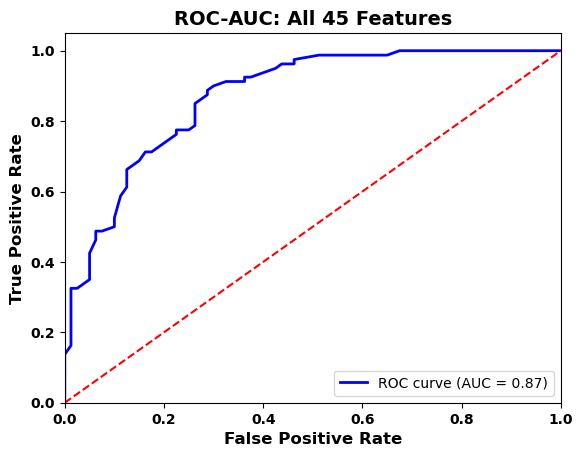

In [5]:
dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(80, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: All 45 Features', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_All45Features.svg')
plt.savefig('ROC_AUC_All45Features.pdf')
plt.show()


## RanFor 100 times. Random Samples = 9

In [6]:
df2 = df1.drop (['APPRDX'], axis=1)

In [7]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])
for i in range (1,101) :
        print(i)
        df3 = df2.sample(9, axis=1)
        df3 = df3.reindex(['APPRDX', *df3.columns], axis=1).assign(APPRDX=df1['APPRDX'])
        dataset = df3.groupby('APPRDX').apply(lambda x: x.sample(80))
        X = dataset.iloc[:, 1:].values
        y = dataset.iloc[:, 0].values
        random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
        scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
        mean_score = scores.mean()
        print(f'Mean accuracy: {mean_score}')
        new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
        dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.61875
2
Mean accuracy: 0.7
3
Mean accuracy: 0.6375
4
Mean accuracy: 0.5875
5
Mean accuracy: 0.575
6
Mean accuracy: 0.7125
7
Mean accuracy: 0.70625
8
Mean accuracy: 0.625
9
Mean accuracy: 0.66875
10
Mean accuracy: 0.825
11
Mean accuracy: 0.55625
12
Mean accuracy: 0.70625
13
Mean accuracy: 0.7375
14
Mean accuracy: 0.79375
15
Mean accuracy: 0.63125
16
Mean accuracy: 0.675
17
Mean accuracy: 0.61875
18
Mean accuracy: 0.58125
19
Mean accuracy: 0.58125
20
Mean accuracy: 0.63125
21
Mean accuracy: 0.525
22
Mean accuracy: 0.5875
23
Mean accuracy: 0.6
24
Mean accuracy: 0.6625
25
Mean accuracy: 0.6875
26
Mean accuracy: 0.66875
27
Mean accuracy: 0.6125
28
Mean accuracy: 0.525
29
Mean accuracy: 0.70625
30
Mean accuracy: 0.70625
31
Mean accuracy: 0.7
32
Mean accuracy: 0.73125
33
Mean accuracy: 0.64375
34
Mean accuracy: 0.58125
35
Mean accuracy: 0.68125
36
Mean accuracy: 0.66875
37
Mean accuracy: 0.6625
38
Mean accuracy: 0.58125
39
Mean accuracy: 0.65
40
Mean accuracy: 0.54375
41
Me

In [8]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("Random12Feat_from45Feats_100RF10FCV.csv")

0.6548124999999998


## NMI Top 10

In [9]:
df1 = pd.read_csv('NMI_All45Feats_Data.csv')
df1['APPRDX'] = df1['APPRDX'] -1
df1.head(2)

,APPRDX,UPSIT,Montreal_Cognitive,Trail_Making_B,MDSP_Fatigue,Symbol_Digit,MDSP_Constipate,SCOPA_Gastro,MDS_Apathy,MDSP_LightHead,Trail_Making_A
0,0,2,0,1,1,1,1,1,0,0,2
1,0,2,0,0,1,1,0,0,1,1,0


In [10]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(80))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.80625
2
Mean accuracy: 0.825
3
Mean accuracy: 0.8
4
Mean accuracy: 0.8
5
Mean accuracy: 0.83125
6
Mean accuracy: 0.79375
7
Mean accuracy: 0.79375
8
Mean accuracy: 0.83125
9
Mean accuracy: 0.83125
10
Mean accuracy: 0.8125
11
Mean accuracy: 0.8
12
Mean accuracy: 0.825
13
Mean accuracy: 0.78125
14
Mean accuracy: 0.825
15
Mean accuracy: 0.81875
16
Mean accuracy: 0.825
17
Mean accuracy: 0.81875
18
Mean accuracy: 0.7625
19
Mean accuracy: 0.80625
20
Mean accuracy: 0.84375
21
Mean accuracy: 0.7875
22
Mean accuracy: 0.8
23
Mean accuracy: 0.80625
24
Mean accuracy: 0.81875
25
Mean accuracy: 0.7625
26
Mean accuracy: 0.8
27
Mean accuracy: 0.79375
28
Mean accuracy: 0.8
29
Mean accuracy: 0.83125
30
Mean accuracy: 0.83125
31
Mean accuracy: 0.825
32
Mean accuracy: 0.76875
33
Mean accuracy: 0.85
34
Mean accuracy: 0.825
35
Mean accuracy: 0.83125
36
Mean accuracy: 0.81875
37
Mean accuracy: 0.83125
38
Mean accuracy: 0.81875
39
Mean accuracy: 0.8375
40
Mean accuracy: 0.825
41
Mean accurac

In [11]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NonMotor_10Feat_inNMI_from45Feats_100RF10FCV.csv")

0.8084375


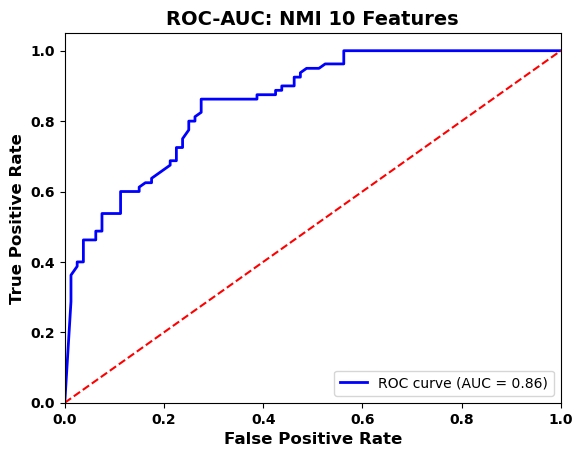

In [12]:
dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(80, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: NMI 10 Features', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_NMI10Feat.svg')
plt.savefig('ROC_AUC_NMI10Feat.pdf')
plt.show()


## Random Forest All 10

In [13]:
df1 = pd.read_csv('RanFor_All45Feats_Data.csv')
df1['APPRDX'] = df1['APPRDX'] -1
df1.head(2)

,APPRDX,UPSIT,MDSP_Fatigue,Symbol_Digit,Trail_Making_B,Montreal_Cognitive,Lexical_Fluency,LetterNumber,REM_Dream,SCOPA_Sex,Modif_Boston
0,0,2,1,1,1,0,1,1,2,1,1
1,0,2,1,1,0,0,1,1,2,0,1


In [14]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(80))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.83125
2
Mean accuracy: 0.8375
3
Mean accuracy: 0.825
4
Mean accuracy: 0.79375
5
Mean accuracy: 0.825
6
Mean accuracy: 0.83125
7
Mean accuracy: 0.81875
8
Mean accuracy: 0.86875
9
Mean accuracy: 0.84375
10
Mean accuracy: 0.84375
11
Mean accuracy: 0.8125
12
Mean accuracy: 0.83125
13
Mean accuracy: 0.78125
14
Mean accuracy: 0.83125
15
Mean accuracy: 0.83125
16
Mean accuracy: 0.825
17
Mean accuracy: 0.84375
18
Mean accuracy: 0.85625
19
Mean accuracy: 0.825
20
Mean accuracy: 0.85
21
Mean accuracy: 0.8
22
Mean accuracy: 0.7875
23
Mean accuracy: 0.8375
24
Mean accuracy: 0.825
25
Mean accuracy: 0.8125
26
Mean accuracy: 0.80625
27
Mean accuracy: 0.825
28
Mean accuracy: 0.80625
29
Mean accuracy: 0.8125
30
Mean accuracy: 0.85
31
Mean accuracy: 0.84375
32
Mean accuracy: 0.86875
33
Mean accuracy: 0.8625
34
Mean accuracy: 0.81875
35
Mean accuracy: 0.85625
36
Mean accuracy: 0.80625
37
Mean accuracy: 0.83125
38
Mean accuracy: 0.84375
39
Mean accuracy: 0.81875
40
Mean accuracy: 0.8687

In [15]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NonMotor_10Feat_inRanFor_from45Feats_100RF10FCV.csv")

0.8264999999999997


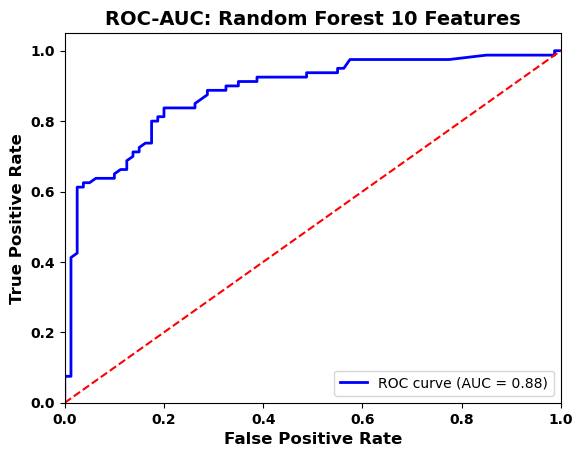

In [16]:
dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(80, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: Random Forest 10 Features', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_RF10Feat.svg')
plt.savefig('ROC_AUC_RF10Feat.pdf')
plt.show()


## Boruta All 10

In [17]:
df1 = pd.read_csv('BorutaR_All45Feats_Data.csv')
df1['APPRDX'] = df1['APPRDX'] -1
df1.head(2)

,APPRDX,MDSP_Fatigue,MDS_Apathy,Montreal_Cognitive,REM_Dream,SCOPA_Gastro,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
0,0,1,0,0,2,1,1,2,1,2
1,0,1,1,0,2,0,1,0,0,2


In [18]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(80))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.825
2
Mean accuracy: 0.85
3
Mean accuracy: 0.8125
4
Mean accuracy: 0.8125
5
Mean accuracy: 0.85625
6
Mean accuracy: 0.83125
7
Mean accuracy: 0.81875
8
Mean accuracy: 0.8625
9
Mean accuracy: 0.83125
10
Mean accuracy: 0.875
11
Mean accuracy: 0.85
12
Mean accuracy: 0.8125
13
Mean accuracy: 0.79375
14
Mean accuracy: 0.83125
15
Mean accuracy: 0.8125
16
Mean accuracy: 0.83125
17
Mean accuracy: 0.8125
18
Mean accuracy: 0.85625
19
Mean accuracy: 0.825
20
Mean accuracy: 0.85
21
Mean accuracy: 0.8
22
Mean accuracy: 0.80625
23
Mean accuracy: 0.81875
24
Mean accuracy: 0.81875
25
Mean accuracy: 0.825
26
Mean accuracy: 0.8125
27
Mean accuracy: 0.825
28
Mean accuracy: 0.8
29
Mean accuracy: 0.79375
30
Mean accuracy: 0.875
31
Mean accuracy: 0.85
32
Mean accuracy: 0.86875
33
Mean accuracy: 0.85
34
Mean accuracy: 0.825
35
Mean accuracy: 0.85
36
Mean accuracy: 0.8
37
Mean accuracy: 0.83125
38
Mean accuracy: 0.825
39
Mean accuracy: 0.81875
40
Mean accuracy: 0.8625
41
Mean accuracy: 0.768

In [19]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NonMotor_10Feat_inBoruta_from45Feats_100RF10FCV.csv")

0.8259374999999994


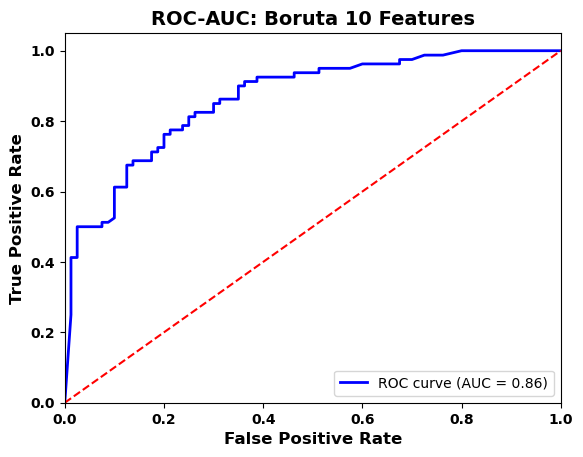

In [20]:
dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(80, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: Boruta 10 Features', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_Boruta10Feat.svg')
plt.savefig('ROC_AUC_Boruta10Feat.pdf')
plt.show()


## Decision Tree Top 10

In [21]:
df1 = pd.read_csv('DecTree_All45Feats_Data.csv')
df1['APPRDX'] = df1['APPRDX'] -1
df1.head(2)

,APPRDX,UPSIT,Trail_Making_B,MDSP_Fatigue,Montreal_Cognitive,Symbol_Digit
0,0,2,1,1,0,1
1,0,2,0,1,0,1


In [22]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(80))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.7875
2
Mean accuracy: 0.8
3
Mean accuracy: 0.83125
4
Mean accuracy: 0.79375
5
Mean accuracy: 0.8125
6
Mean accuracy: 0.8
7
Mean accuracy: 0.83125
8
Mean accuracy: 0.85625
9
Mean accuracy: 0.8625
10
Mean accuracy: 0.83125
11
Mean accuracy: 0.8
12
Mean accuracy: 0.8
13
Mean accuracy: 0.775
14
Mean accuracy: 0.825
15
Mean accuracy: 0.8375
16
Mean accuracy: 0.85
17
Mean accuracy: 0.83125
18
Mean accuracy: 0.78125
19
Mean accuracy: 0.81875
20
Mean accuracy: 0.85
21
Mean accuracy: 0.8
22
Mean accuracy: 0.8
23
Mean accuracy: 0.80625
24
Mean accuracy: 0.825
25
Mean accuracy: 0.7875
26
Mean accuracy: 0.81875
27
Mean accuracy: 0.76875
28
Mean accuracy: 0.80625
29
Mean accuracy: 0.8375
30
Mean accuracy: 0.84375
31
Mean accuracy: 0.79375
32
Mean accuracy: 0.79375
33
Mean accuracy: 0.84375
34
Mean accuracy: 0.825
35
Mean accuracy: 0.84375
36
Mean accuracy: 0.79375
37
Mean accuracy: 0.83125
38
Mean accuracy: 0.8125
39
Mean accuracy: 0.83125
40
Mean accuracy: 0.825
41
Mean accuracy

In [23]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NonMotor_10Feat_inDecTree_from45Feats_100RF10FCV.csv", index=False)

0.8116249999999999


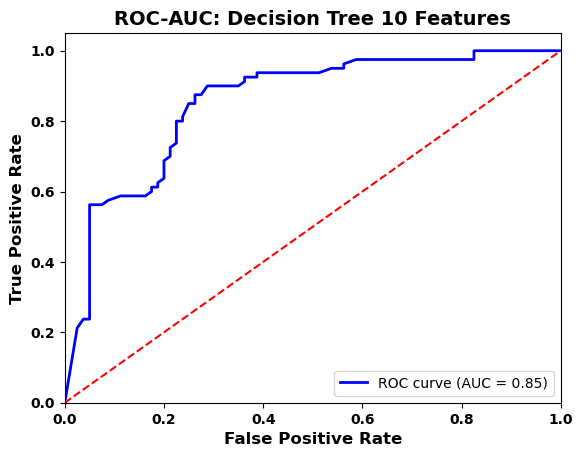

In [24]:
dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(80, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: Decision Tree 10 Features', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_DecTree10Feat.svg')
plt.savefig('ROC_AUC_DecTree10Feat.pdf')
plt.show()


## Common CpG in at least two. Sample = 12

In [25]:
df = pd.read_csv('Any2Common_inAll45Feats_Data.csv')
print(df.shape)
df.head(3)

(251, 11)


,PATNO,APPRDX,MDS_Apathy,MDSP_Fatigue,Montreal_Cognitive,REM_Dream,SCOPA_Gastro,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
0,3002,1,0,1,0,2,1,1,2,1,2
1,3010,1,1,1,0,2,0,1,0,0,2
2,3020,1,0,1,0,1,1,2,2,1,1


In [26]:
df1 = df.drop(['PATNO'], axis=1)
df1['APPRDX'] = df1['APPRDX'] -1
df1.head(2)

,APPRDX,MDS_Apathy,MDSP_Fatigue,Montreal_Cognitive,REM_Dream,SCOPA_Gastro,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
0,0,0,1,0,2,1,1,2,1,2
1,0,1,1,0,2,0,1,0,0,2


In [27]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(80))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.825
2
Mean accuracy: 0.825
3
Mean accuracy: 0.8125
4
Mean accuracy: 0.80625
5
Mean accuracy: 0.8375
6
Mean accuracy: 0.85
7
Mean accuracy: 0.7875
8
Mean accuracy: 0.875
9
Mean accuracy: 0.84375
10
Mean accuracy: 0.8625
11
Mean accuracy: 0.85
12
Mean accuracy: 0.8125
13
Mean accuracy: 0.7875
14
Mean accuracy: 0.81875
15
Mean accuracy: 0.8125
16
Mean accuracy: 0.8375
17
Mean accuracy: 0.81875
18
Mean accuracy: 0.84375
19
Mean accuracy: 0.79375
20
Mean accuracy: 0.84375
21
Mean accuracy: 0.8125
22
Mean accuracy: 0.80625
23
Mean accuracy: 0.825
24
Mean accuracy: 0.8375
25
Mean accuracy: 0.8375
26
Mean accuracy: 0.8125
27
Mean accuracy: 0.81875
28
Mean accuracy: 0.80625
29
Mean accuracy: 0.81875
30
Mean accuracy: 0.85625
31
Mean accuracy: 0.8625
32
Mean accuracy: 0.86875
33
Mean accuracy: 0.84375
34
Mean accuracy: 0.8125
35
Mean accuracy: 0.85
36
Mean accuracy: 0.81875
37
Mean accuracy: 0.81875
38
Mean accuracy: 0.825
39
Mean accuracy: 0.8125
40
Mean accuracy: 0.85625
41


In [28]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NonMotor_12Feat_inAny2Common_from45Feats_100RF10FCV.csv", index=False)

0.8259375000000004


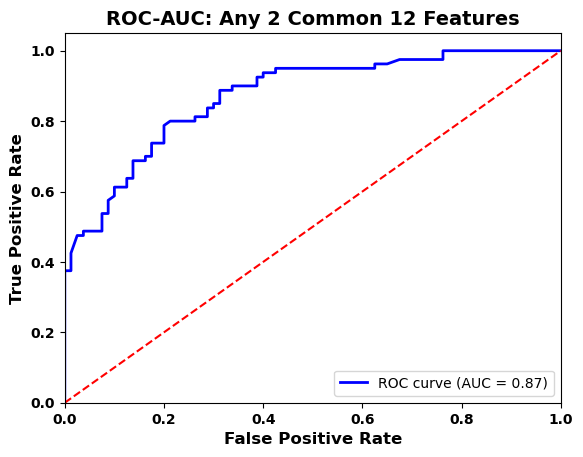

In [29]:
dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(80, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: Any 2 Common 12 Features', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_Common12Feat.svg')
plt.savefig('ROC_AUC_Common12Feat.pdf')
plt.show()


## Common CpG in all four methods. Sample = 18

In [30]:
df1 = pd.read_csv('AllCommon_inAll45Feats_Data.csv')
df1['APPRDX'] = df1['APPRDX'] -1
df1.head(2)

,APPRDX,LetterNumber,Lexical_Fluency,MDS_Apathy,MDSP_Constipate,MDSP_Fatigue,MDSP_LightHead,Modif_Boston,Montreal_Cognitive,REM_Dream,SCOPA_Gastro,SCOPA_Sex,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
0,0,1,1,0,1,1,0,1,0,2,1,1,1,2,1,2
1,0,1,1,1,0,1,1,1,0,2,0,0,1,0,0,2


In [31]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(80))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.83125
2
Mean accuracy: 0.8375
3
Mean accuracy: 0.8125
4
Mean accuracy: 0.81875
5
Mean accuracy: 0.85625
6
Mean accuracy: 0.85
7
Mean accuracy: 0.8125
8
Mean accuracy: 0.85
9
Mean accuracy: 0.8375
10
Mean accuracy: 0.8375
11
Mean accuracy: 0.80625
12
Mean accuracy: 0.81875
13
Mean accuracy: 0.75
14
Mean accuracy: 0.83125
15
Mean accuracy: 0.81875
16
Mean accuracy: 0.8375
17
Mean accuracy: 0.825
18
Mean accuracy: 0.8375
19
Mean accuracy: 0.825
20
Mean accuracy: 0.8625
21
Mean accuracy: 0.7875
22
Mean accuracy: 0.8
23
Mean accuracy: 0.83125
24
Mean accuracy: 0.83125
25
Mean accuracy: 0.79375
26
Mean accuracy: 0.825
27
Mean accuracy: 0.8
28
Mean accuracy: 0.79375
29
Mean accuracy: 0.81875
30
Mean accuracy: 0.8375
31
Mean accuracy: 0.85625
32
Mean accuracy: 0.86875
33
Mean accuracy: 0.86875
34
Mean accuracy: 0.825
35
Mean accuracy: 0.85625
36
Mean accuracy: 0.81875
37
Mean accuracy: 0.81875
38
Mean accuracy: 0.84375
39
Mean accuracy: 0.8375
40
Mean accuracy: 0.8375
41
Mea

In [32]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NonMotor_18Feat_inAllCommon_from45Feats_100RF10FCV.csv", index=False)

0.8252499999999996


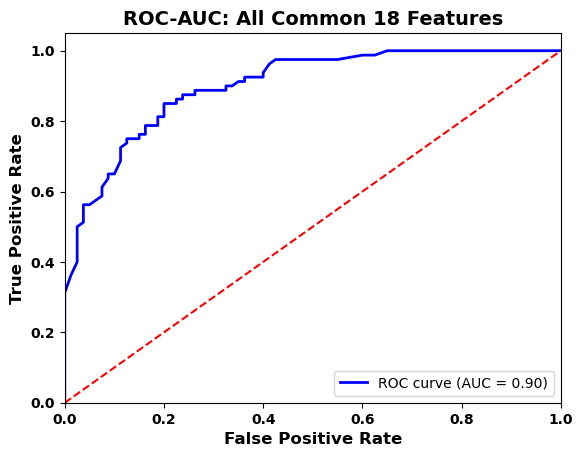

In [33]:
dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(80, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: All Common 18 Features', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_allCommon18Feat.svg')
plt.savefig('ROC_AUC_allCommon18Feat.pdf')
plt.show()
